# PREDICTIVE CRIME ANALYSIS

Our goal is to develop a comprehensive crime forecasting system utilizing advanced data analytics and identify intricate crime patterns and potential hotspots for proactive law enforcement action. By achieving these goals, our project aspires to contribute significantly to the advancement of crime prevention efforts, creating a safer and more secure environment for all.

## Importing Data

* Load the dataset

In [1]:
# Importing the necessary libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [9]:
# Concatenate the three excel files chosen for analysis into one dataframe

excel_names = ['2013', '2014', '2015']
data = {}  # the dictionary that contains all the dataframes extracted from excel files one by one

for year in excel_names:
    excel_file = pd.ExcelFile(f'{year}.xlsx')  # Assuming your Excel files have extension '.xlsx'
    sheet_name = excel_file.sheet_names[0]
    df = excel_file.parse(sheet_name)
     # Reset index
    df = df.reset_index(drop=True)

    # Store DataFrame in the data dictionary
    data[year] = df

## Data Exploration

* Understanding the structure of the dataset

In [10]:
df.head(10)

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7624403,663901,30502.0
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7626061,707425,4102.0
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7626432,655739,6501.0
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7638375,689076,4500.0
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7640361,706981,3901.0
5,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7641184,684207,5200.0
6,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7642461,681872,10600.0
7,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7644539,686561,5100.0
8,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7644616,684828,5100.0
9,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7644950,683925,10600.0


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208083 entries, 0 to 208082
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CATEGORY         208083 non-null  object        
 1   CALL GROUPS      208083 non-null  object        
 2   final_case_type  208083 non-null  object        
 3   CASE DESC        208083 non-null  object        
 4   occ_date         208083 non-null  datetime64[ns]
 5   x_coordinate     208083 non-null  int64         
 6   y_coordinate     208083 non-null  int64         
 7   census_tract     198253 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 12.7+ MB
None


In [12]:
df.shape


(208083, 8)

## Data Preprocessing

* Checking for missing values, duplicates

In [13]:
#check for missing values in the dataframe
print("Missing values in the entire DataFrame:")
print(df.isnull().sum())

Missing values in the entire DataFrame:
CATEGORY              0
CALL GROUPS           0
final_case_type       0
CASE DESC             0
occ_date              0
x_coordinate          0
y_coordinate          0
census_tract       9830
dtype: int64


In [14]:
# Drop column census_tract
df = df.drop('census_tract', axis=1)
df.head(5)

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7624403,663901
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7626061,707425
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7626432,655739
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7638375,689076
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7640361,706981


In [15]:
# Check for duplicate rows in dataframe
print("Duplicate rows:")
print(df[df.duplicated()])

Duplicate rows:
             CATEGORY     CALL GROUPS final_case_type  \
108     STREET CRIMES        DISORDER          DISTP    
692     STREET CRIMES        DISORDER          DISTP    
722     STREET CRIMES        DISORDER          DISTP    
928     STREET CRIMES        DISORDER          DISTP    
1027    STREET CRIMES        DISORDER          DISTP    
...               ...             ...             ...   
207334       BURGLARY      SUSPICIOUS          PROWLP   
207654       BURGLARY  PROPERTY CRIME          BURGP    
207794       BURGLARY  PROPERTY CRIME          BURGP    
207880       BURGLARY  PROPERTY CRIME          BURGP    
207964       BURGLARY  PROPERTY CRIME          BURGP    

                                                CASE DESC   occ_date  \
108     DISTURBANCE - PRIORITY                        ... 2015-01-09   
692     DISTURBANCE - PRIORITY                        ... 2015-01-07   
722     DISTURBANCE - PRIORITY                        ... 2015-01-09   
928     DIS

In [16]:
# Drop duplicates and keep one value
df = df.drop_duplicates()
print("\nDataFrame shape after removing duplicates:")
df.shape


DataFrame shape after removing duplicates:


(205075, 7)

In [17]:
df.head(5)

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7624403,663901
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7626061,707425
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7626432,655739
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7638375,689076
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2015-01-01,7640361,706981


## Data Analysis

* Analyzing the dataset

In [22]:
# Importing the Portland police districts data
districts = gpd.read_file('Districts.shx')
print(districts.head(5))

                                            geometry
0  POLYGON ((7613256.002 720408.387, 7614738.255 ...
1  POLYGON ((7635005.228 719955.219, 7635232.526 ...
2  POLYGON ((7635906.569 711714.334, 7635888.371 ...
3  POLYGON ((7654104.668 713032.091, 7654105.382 ...
4  POLYGON ((7641423.091 709033.861, 7642274.833 ...


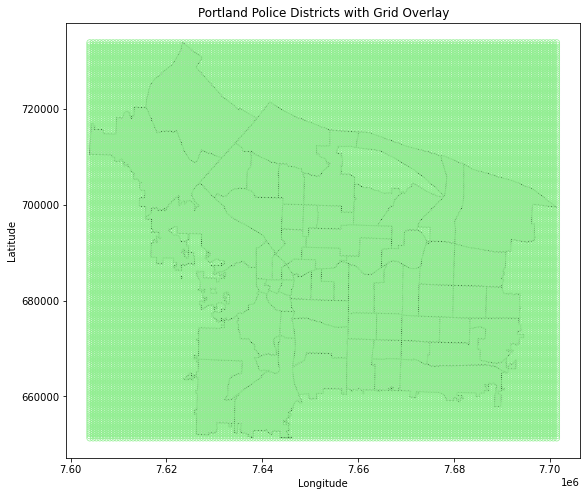

In [23]:
# Define the grid parameters
cell_size = 600  # in sq.ft
grid_size = (140, 180)

# Create a GeoDataFrame for the grid
xmin, ymin, xmax, ymax = districts.total_bounds
x_coords = np.linspace(xmin, xmax, grid_size[0] + 1)
y_coords = np.linspace(ymin, ymax, grid_size[1] + 1)

grid_cells = gpd.GeoDataFrame(geometry=[Point(x, y) for x in x_coords for y in y_coords], crs=districts.crs)

# Plot of the police districts
ax = districts.plot(color="lightgray", edgecolor="black", figsize=(12, 8))

# Plot the grid on top of the police districts
grid_cells.plot(ax=ax, color="none", edgecolor="lightgreen", linewidth=0.7)

# Customize the plot
ax.set_title("Portland Police Districts with Grid Overlay")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

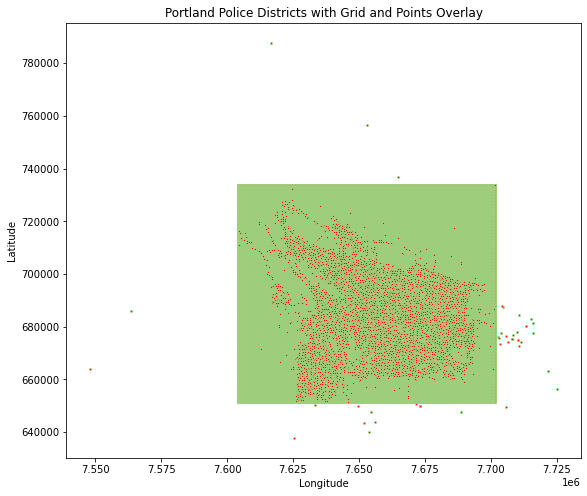

In [24]:
# Define the grid parameters
cell_size = 600  # in sq.ft
grid_size = (280, 360)

# Create a GeoDataFrame for the grid
xmin, ymin, xmax, ymax = districts.total_bounds
x_coords = np.linspace(xmin, xmax, grid_size[0] + 1)
y_coords = np.linspace(ymin, ymax, grid_size[1] + 1)

grid_cells = gpd.GeoDataFrame(geometry=[Point(x, y) for x in x_coords for y in y_coords], crs=districts.crs)

# Create a GeoDataFrame for the points
points_geometry = [Point(lon, lat) for lon, lat in zip(df['x_coordinate'], df['y_coordinate'])]
points_gdf = gpd.GeoDataFrame(geometry=points_geometry, crs=districts.crs)

# Concatenate the grid_cells and points_gdf GeoDataFrames
combined_gdf = gpd.GeoDataFrame(geometry=pd.concat([grid_cells['geometry'], points_gdf['geometry']], ignore_index=True))

# Plot of the police districts
ax = districts.plot(color="lightgray", edgecolor="black", figsize=(12, 8))

# Plot the grid on top of the police districts
combined_gdf.plot(ax=ax, color="red", edgecolor="lightgreen", linewidth=0.7, markersize=5, marker='o', )

# Customize the plot
ax.set_title("Portland Police Districts with Grid and Points Overlay")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

## Model Building

* Machine learning model to predict crime locations

C:\Users\Princess\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"





Epoch 1/50

5127/5127 [==============================] - 46s 8ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 2/50
5127/5127 [==============================] - 41s 8ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 3/50
5127/5127 [==============================] - 42s 8ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 4/50
5127/5127 [==============================] - 43s 8ms/step - loss: 0.0074 - val_loss: 0.0072
Epoch 5/50
5127/5127 [==============================] - 38s 7ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 6/50
5127/5127 [==============================] - 40s 8ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 7/50
5127/5127 [==============================] - 41s 8ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 8/50
5127/5127 [==============================] - 45s 9ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 9/50
5127/5127 [==============================] - 43s 8ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 10/50
5127/5127 [==============================] - 43s 8ms/step

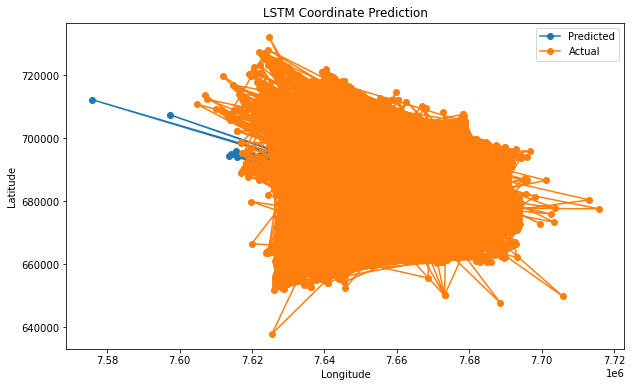

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Combine longitude and latitude into a single column 
df['coordinates'] = list(zip(df['x_coordinate'], df['y_coordinate']))

# Convert the coordinates to numpy array
coordinates = np.array(df['coordinates'].tolist())

# Normalize coordinates using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_coordinates = scaler.fit_transform(coordinates)

# Create sequences for training the LSTM model
sequence_length = 10  
X, y = [], []
for i in range(len(scaled_coordinates) - sequence_length):
    X.append(scaled_coordinates[i:i+sequence_length])
    y.append(scaled_coordinates[i+sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(2))  # Output layer with 2 neurons for longitude and latitude
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to original coordinates
predicted_coordinates = scaler.inverse_transform(predictions)
actual_coordinates = scaler.inverse_transform(y_test)

# Plot the predicted vs actual coordinates
plt.figure(figsize=(10, 6))
plt.plot(predicted_coordinates[:, 0], predicted_coordinates[:, 1], label='Predicted', marker='o')
plt.plot(actual_coordinates[:, 0], actual_coordinates[:, 1], label='Actual', marker='o')
plt.title('LSTM Coordinate Prediction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Testing the model

* Assessing the model's performance on a set of data 

<Figure size 720x432 with 0 Axes>

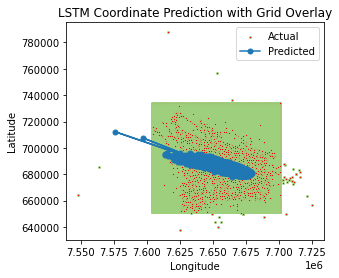

In [26]:
# Plot the predicted vs actual coordinates with grid overlay
plt.figure(figsize=(10, 6))

# Plot the grid on top of the police districts
ax = districts.plot(color="lightgray", edgecolor="black")
combined_gdf.plot(ax=ax, color="red", edgecolor="lightgreen", linewidth=0.7, markersize=5, marker='o', label='Actual')
plt.plot(predicted_coordinates[:, 0], predicted_coordinates[:, 1], label='Predicted',markersize=5, marker='o')

plt.title('LSTM Coordinate Prediction with Grid Overlay')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Evaluate the Model's Performance

* Assessing how well the model is doing.

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model on the test set using model.evaluate
loss = model.evaluate(X_test, y_test)
print(f'Loss on Test Set: {loss}')

# Compute regression metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

1282/1282 [==============================] - 4s 3ms/step - loss: 0.0067
Loss on Test Set: 0.006732942070811987
Mean Squared Error: 0.006732945813747113
Mean Absolute Error: 0.06280161165392549
Root Mean Squared Error: 0.08205452951389773
